# Introduction to Tensorflow

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("./data/", one_hot=True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
single_image = mnist.train.images[1].reshape(28,28)

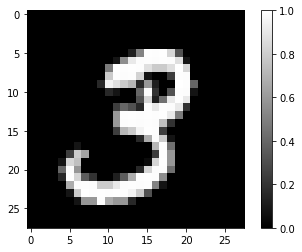

In [6]:
plt.imshow(single_image, cmap="gist_gray")
plt.colorbar()

In [7]:
#Placeholder
X = tf.placeholder(tf.float32, shape=[None, 784])

In [8]:
#Variables
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [9]:
#Create graph operations
y = tf.matmul(X,W) + b

In [10]:
#Loss function
y_true = tf.placeholder(tf.float32, [None, 10])

In [11]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [12]:
#Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [13]:
init = tf.global_variables_initializer()

In [14]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_X, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict = {X: batch_X, y_true: batch_y})
    #Evaluate a model
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    #[True, False, True, True ... ] -> [1,0,1,1...]
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(sess.run(acc, feed_dict = {X:mnist.test.images, y_true:mnist.test.labels}))    

0.9114


# CNN approach